## TensorFlow

In [4]:
import tensorflow as tf
hello = tf.constant('Hello World')
sess = tf.Session()
sess.run(hello)

b'Hello World'

### Constant

In [5]:
import tensorflow as tf
hello = tf.constant('Hello World')

with tf.Session() as sess:
    print(sess.run(hello))

b'Hello World'


In [6]:
x = tf.constant(2)
y = tf.constant(3)
with tf.Session() as sess:
    print(sess.run(x+y))

5


In [7]:
with tf.Session() as sess:
    print(sess.run(x + y))
    print(sess.run(x - y))
    print(sess.run(x * y))
    print(sess.run(x / y))

5
-1
6
0.6666666666666666


### Placeholder

In [8]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [9]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)
div = tf.divide(x,y)

In [10]:
with tf.Session() as sess:
    print(sess.run(add, feed_dict={x:20, y:30}))
    print(sess.run(sub, feed_dict={x:20, y:30}))
    print(sess.run(mul, feed_dict={x:20, y:30}))
    print(sess.run(div, feed_dict={x:20, y:30}))

50
-10
600
0.6666666666666666


In [11]:
import numpy as np
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [12]:
a.shape

(1, 2)

In [13]:
b.shape

(2, 1)

In [14]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [15]:
matrix_multi = tf.matmul(mat1,mat2)

In [16]:
with tf.Session() as sess:
    x = sess.run(matrix_multi)

In [17]:
x

array([[20.]])

## 使用TensorFlow 辨識手寫數字

In [18]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/davidchiu/tmp", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/davidchiu/tmp/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/davidchiu/tmp/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/davidchiu/tmp/t10k-images-idx3-ubyte.gz
Extracting /Users/davidchiu/tmp/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [19]:
mnist.train.images.shape

(55000, 784)

In [20]:
sample_image = mnist.train.images[0].reshape((28,28))

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['add']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


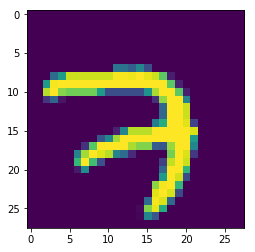

In [21]:
% pylab inline
import matplotlib.pyplot as plt
plt.imshow(sample_image)

In [22]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

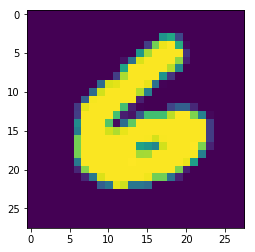

In [23]:
sample_image = mnist.train.images[18].reshape((28,28))
plt.imshow(sample_image)

In [24]:
mnist.train.labels[18]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### 設定網路參數

In [25]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [26]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### Placeholder

In [27]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### 建構神經網路

In [28]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重變數

In [31]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [32]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 設定 cost 與 optimizer

In [34]:
pred = multilayer_perceptron(x, weights, biases)

In [35]:
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### 初始化變數

In [36]:
init = tf.global_variables_initializer()

### 訓練模型 

In [43]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    # Initial the cost = 0.0
    avg_cost = 0.0

    total_batch = int(n_samples/batch_size)

    for i in range(total_batch):

        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=164.15418444546776
Epoch: 2 cost=61.81171880201861
Epoch: 3 cost=45.483870370171324
Epoch: 4 cost=36.46853502013467
Epoch: 5 cost=30.73705754973672
Epoch: 6 cost=26.606686183322562
Epoch: 7 cost=23.550947105234318
Epoch: 8 cost=21.185782755071475
Epoch: 9 cost=19.2246683300625
Epoch: 10 cost=17.595534928278475
Epoch: 11 cost=16.226387270363894
Epoch: 12 cost=14.999023752537637
Epoch: 13 cost=13.978483177098363
Epoch: 14 cost=13.066234773072322
Epoch: 15 cost=12.24721363847906
Training Completed in 15 Epochs


### 評估模型

In [44]:
pred

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

In [45]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [46]:
correct_predictions = tf.cast(correct_predictions, "float")

In [47]:
accuracy = tf.reduce_mean(correct_predictions)

In [48]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9104


## TensorBoard

In [1]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/davidchiu/tmp", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/davidchiu/tmp/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/davidchiu/tmp/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/davidchiu/tmp/t10k-images-idx3-ubyte.gz
Extracting /Users/davidchiu/tmp/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### Placeholders

In [3]:

with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

In [4]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

In [5]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

In [6]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

In [7]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### 訓練模型

In [8]:
init = tf.global_variables_initializer()

In [9]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard2/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=158.17035009557543
Epoch: 2 cost=55.093468905362265
Epoch: 3 cost=40.616655424291466
Epoch: 4 cost=32.97481956221839
Epoch: 5 cost=27.94403530554335
Epoch: 6 cost=24.31597251263534
Epoch: 7 cost=21.695081967440522
Epoch: 8 cost=19.52034002130683
Epoch: 9 cost=17.874279665730217
Epoch: 10 cost=16.35750202504071
Epoch: 11 cost=15.150252793593832
Epoch: 12 cost=14.083479566790855
Epoch: 13 cost=13.167158144929193
Epoch: 14 cost=12.372177070162525
Epoch: 15 cost=11.624001837210226
Training Completed in 15 Epochs


### 開啟 TensorBoard
- tensorboard --logdir tensorboard2/
- 127.0.0.1:6006

## 安裝 Keras

In [10]:
! pip install keras

You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 引用Keras 套件

In [11]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

Using TensorFlow backend.


### 讀取 MNIST

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
y_train.shape

(60000,)

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
y_test.shape

(10000,)

In [17]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [18]:
x_train.shape

(60000, 784)

In [19]:
x_test.shape

(10000, 784)

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
import keras
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### 設定網路參數

In [24]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 訓練神經網路

In [25]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### 訓練神經網路

In [27]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 34us/step - loss: 1.0084 - acc: 0.7657 - val_loss: 0.4700 - val_acc: 0.8816
Epoch 2/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.4139 - acc: 0.8887 - val_loss: 0.3491 - val_acc: 0.9023
Epoch 3/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.3387 - acc: 0.9049 - val_loss: 0.3044 - val_acc: 0.9151
Epoch 4/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.3015 - acc: 0.9151 - val_loss: 0.2758 - val_acc: 0.9249
Epoch 5/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2758 - acc: 0.9219 - val_loss: 0.2557 - val_acc: 0.9284
Epoch 6/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2558 - acc: 0.9279 - val_loss: 0.2404 - val_acc: 0.9333
Epoch 7/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2388 - acc: 0.9325 - val_loss: 0.2276 - val_acc

## 預測客戶是否流失

In [141]:
import pandas
customer = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [142]:
customer = customer.iloc[:,3:]

In [143]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [144]:
customer['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [145]:
geo = pandas.get_dummies(customer['Geography'])
del geo['France']
geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [146]:
customer['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [147]:
gen = pandas.get_dummies(customer['Gender'])
del gen['Female']
gen.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [148]:
y = customer.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [149]:
del customer['Geography']
del customer['Gender']

In [150]:
X = pandas.concat([customer, geo, gen], axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [151]:
del X['Exited']

In [152]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [153]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### 將資料分成訓練與測試資料集

In [154]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [155]:
x_train.shape

(8000, 11)

In [156]:
x_test.shape

(2000, 11)

In [157]:
y_train.shape

(8000,)

In [158]:
y_test.shape

(2000,)

In [159]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1


### 將資料標準化

In [160]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [161]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [162]:
x_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

### 建構類神經網路

In [163]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [167]:
n_hidden_1 = 6 
n_hidden_2 = 6 
n_input    = 11
n_classes  = 1 

training_epochs = 100
batch_size = 100

### 建構模型

In [168]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape = (n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

### 訓練模型

In [169]:
model.fit(x_train, y_train, batch_size = batch_size, epochs = training_epochs,validation_data=(x_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 48us/step - loss: 0.6270 - acc: 0.7465 - val_loss: 0.5933 - val_acc: 0.7980
Epoch 2/100
8000/8000 [==============================] - 0s 14us/step - loss: 0.5764 - acc: 0.7931 - val_loss: 0.5581 - val_acc: 0.8050
Epoch 3/100
8000/8000 [==============================] - 0s 15us/step - loss: 0.5516 - acc: 0.7949 - val_loss: 0.5378 - val_acc: 0.8050
Epoch 4/100
8000/8000 [==============================] - 0s 14us/step - loss: 0.5361 - acc: 0.7951 - val_loss: 0.5236 - val_acc: 0.8050
Epoch 5/100
8000/8000 [==============================] - 0s 14us/step - loss: 0.5248 - acc: 0.7947 - val_loss: 0.5127 - val_acc: 0.8050
Epoch 6/100
8000/8000 [==============================] - 0s 15us/step - loss: 0.5159 - acc: 0.7948 - val_loss: 0.5037 - val_acc: 0.8050
Epoch 7/100
8000/8000 [==============================] - 0s 16us/step - loss: 0.5085 - acc: 0.7947 - val_loss: 0.4961 - val_acc: 0.8050


8000/8000 [==============================] - 0s 14us/step - loss: 0.4152 - acc: 0.8196 - val_loss: 0.3995 - val_acc: 0.8290
Epoch 61/100
8000/8000 [==============================] - 0s 15us/step - loss: 0.4145 - acc: 0.8209 - val_loss: 0.3988 - val_acc: 0.8295
Epoch 62/100
8000/8000 [==============================] - 0s 14us/step - loss: 0.4138 - acc: 0.8209 - val_loss: 0.3981 - val_acc: 0.8290
Epoch 63/100
8000/8000 [==============================] - 0s 14us/step - loss: 0.4131 - acc: 0.8211 - val_loss: 0.3974 - val_acc: 0.8290
Epoch 64/100
8000/8000 [==============================] - 0s 15us/step - loss: 0.4124 - acc: 0.8220 - val_loss: 0.3967 - val_acc: 0.8285
Epoch 65/100
8000/8000 [==============================] - 0s 14us/step - loss: 0.4117 - acc: 0.8222 - val_loss: 0.3959 - val_acc: 0.8285
Epoch 66/100
8000/8000 [==============================] - 0s 15us/step - loss: 0.4109 - acc: 0.8225 - val_loss: 0.3952 - val_acc: 0.8295
Epoch 67/100
8000/8000 [==============================

### 評估模型

In [170]:
predicted = (model.predict(x_test) > 0.5).flatten().astype(int)

In [171]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predicted)

0.8485

In [172]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[1551,   56],
       [ 247,  146]])

### 模型儲存

In [173]:
model.save('churn.pkl')

### 模型讀取

In [175]:
import keras
model2 = keras.models.load_model('churn.pkl')

In [176]:
model2.predict(x_test)

array([[0.07000732],
       [0.03108145],
       [0.20445141],
       ...,
       [0.64702106],
       [0.08133572],
       [0.23915258]], dtype=float32)

## 優化器

In [185]:
def train_model(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    #classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    #classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    history = classifier.fit(x_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=0,
                    validation_data=(x_test, y_test))
    return history

In [186]:
sgd_model = train_model('sgd')
rmsprop_model = train_model('RMSprop')
adagrad_model = train_model('Adagrad')
adadelta_model = train_model('Adadelta')
adam_model = train_model('Adam')

Populating the interactive namespace from numpy and matplotlib


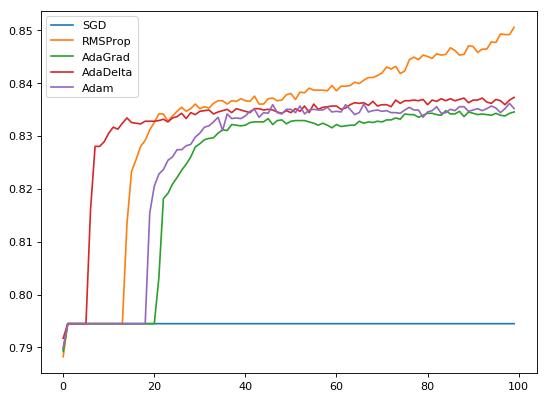

In [187]:
% pylab inline
import matplotlib.pyplot  as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sgd_model.epoch, sgd_model.history['acc'], label='SGD')
plt.plot(rmsprop_model.epoch, rmsprop_model.history['acc'], label='RMSProp')
plt.plot(adagrad_model.epoch, adagrad_model.history['acc'], label='AdaGrad')
plt.plot(adadelta_model.epoch, adadelta_model.history['acc'], label='AdaDelta')
plt.plot(adam_model.epoch, adam_model.history['acc'], label='Adam')
plt.legend()
plt.show()